In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve, auc, classification_report
)
print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [15]:
# Load the dataset
train_df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

In [16]:
df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [18]:
from sklearn.ensemble import RandomForestClassifier  # Added missing import

# Create a Random Forest Classifier model (enhanced configuration)
# Added: class_weight='balanced' to handle imbalance, n_jobs for parallelism, increased trees for stability
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)
print("Initialized RandomForestClassifier with enhanced parameters")

Initialized RandomForestClassifier with enhanced parameters


In [19]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [20]:
# Apply one-hot encoding to training and testing data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=False)

In [21]:
# Align columns - crucial for consistent feature sets between train and test
# This handles cases where test set might not have all categories present in train
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

In [22]:
# Ensure the order of columns is the same
X_test_encoded = X_test_encoded[train_cols]

In [23]:
df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Train the model using the encoded data
model.fit(X_train_encoded, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

In [26]:
# Evaluate the model (use probabilities for proper ROC/PR metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, brier_score_loss

# Probabilities
y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

# Predictions at default threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
confusion = confusion_matrix(y_test, y_pred)
brier_score = brier_score_loss(y_test, y_pred_proba)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)
print("Brier Score:", brier_score)

Test Set Accuracy: 0.9191584150366648
Precision: 0.8571428571428571
Recall: 0.0024086712163789645
F1 Score: 0.004803843074459567
ROC AUC Score: 0.7388590308845323
Average Precision Score: 0.21971811438617161
Confusion Matrix:
[[56519     2]
 [ 4970    12]]
Brier Score: 0.06929768412380968


In [27]:
# Create a pandas Series of feature importances with column names as index
column_names = X_train_encoded.columns.tolist()
feature_importances = pd.Series(model.feature_importances_, index=column_names)

# Sort the importances in descending order and display the top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features:")
print(top_features)

Top 10 most important features:
EXT_SOURCE_3              0.067291
EXT_SOURCE_2              0.062094
DAYS_BIRTH                0.033703
EXT_SOURCE_1              0.032405
DAYS_EMPLOYED             0.029464
DAYS_ID_PUBLISH           0.029414
DAYS_LAST_PHONE_CHANGE    0.028488
AMT_ANNUITY               0.028293
DAYS_REGISTRATION         0.028267
AMT_CREDIT                0.027559
dtype: float64


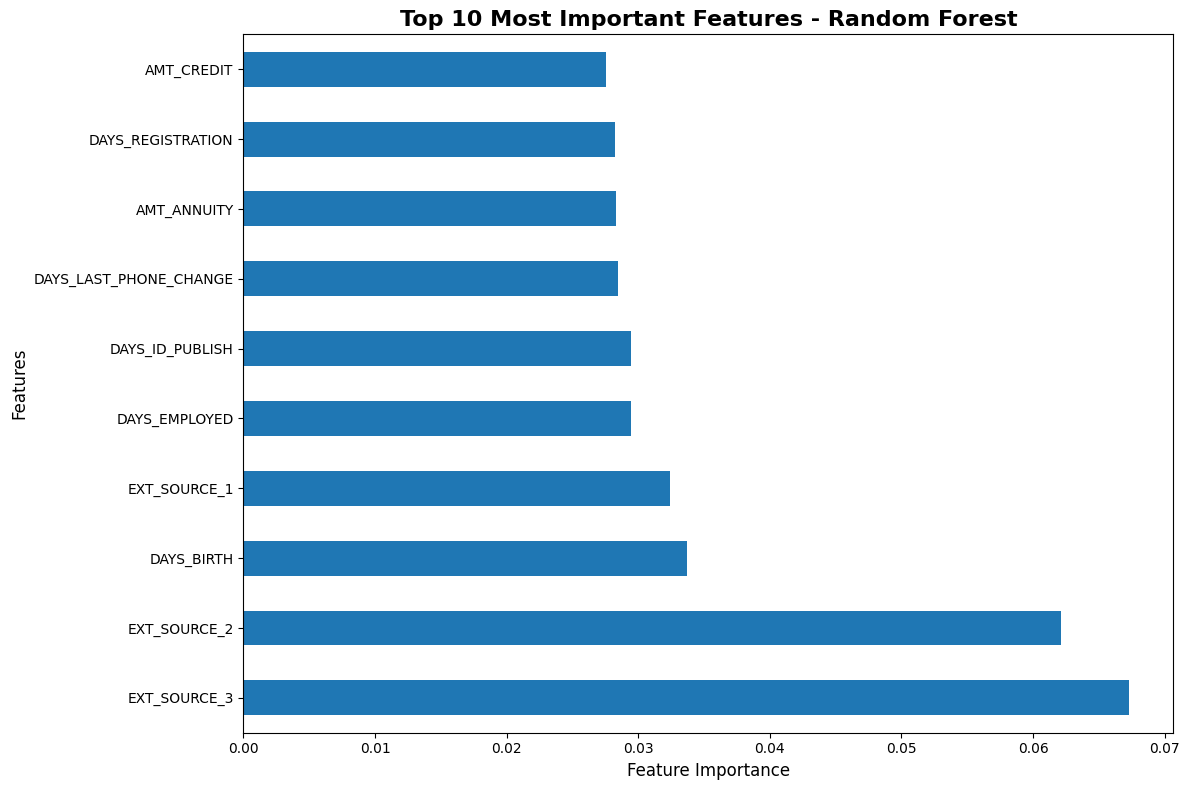

In [28]:
# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

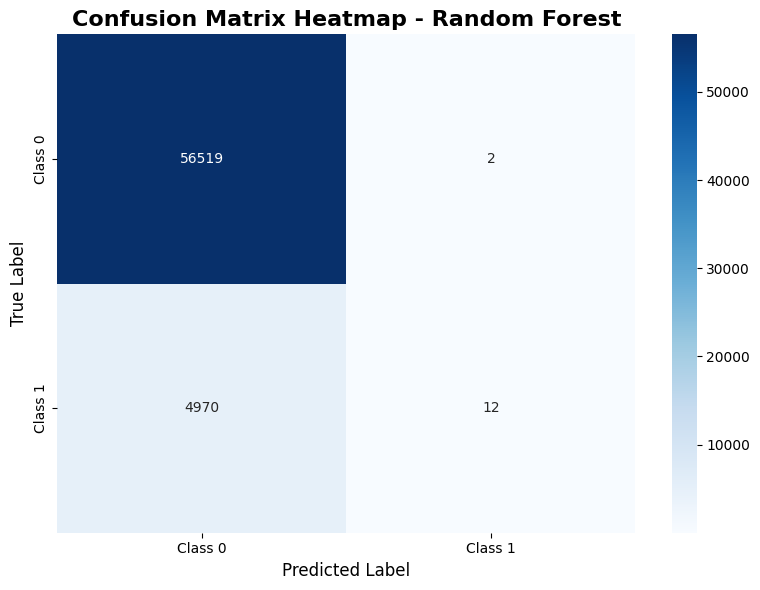


Confusion Matrix Breakdown:
True Negatives (TN): 56519
False Positives (FP): 2
False Negatives (FN): 4970
True Positives (TP): 12


In [29]:
# Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix details
tn, fp, fn, tp = confusion.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

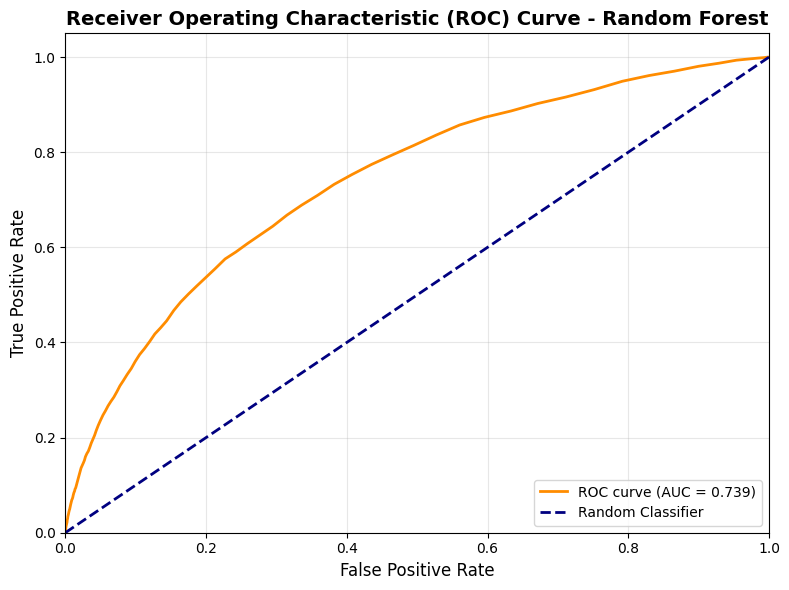

In [30]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for ROC curve
y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_curve:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

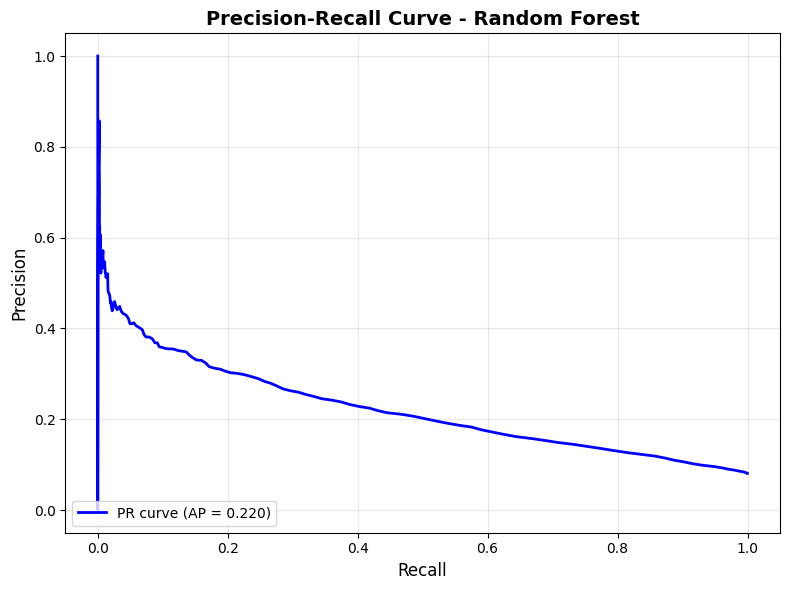

In [31]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== MODEL PERFORMANCE (REUSED FROM PRIOR EVALUATION) ===
Test Set Accuracy: 0.9192
Precision: 0.8571
Recall: 0.0024
F1 Score: 0.0048
ROC AUC Score: 0.7389
Average Precision Score: 0.2197
Confusion Matrix:
[[56519     2]
 [ 4970    12]]


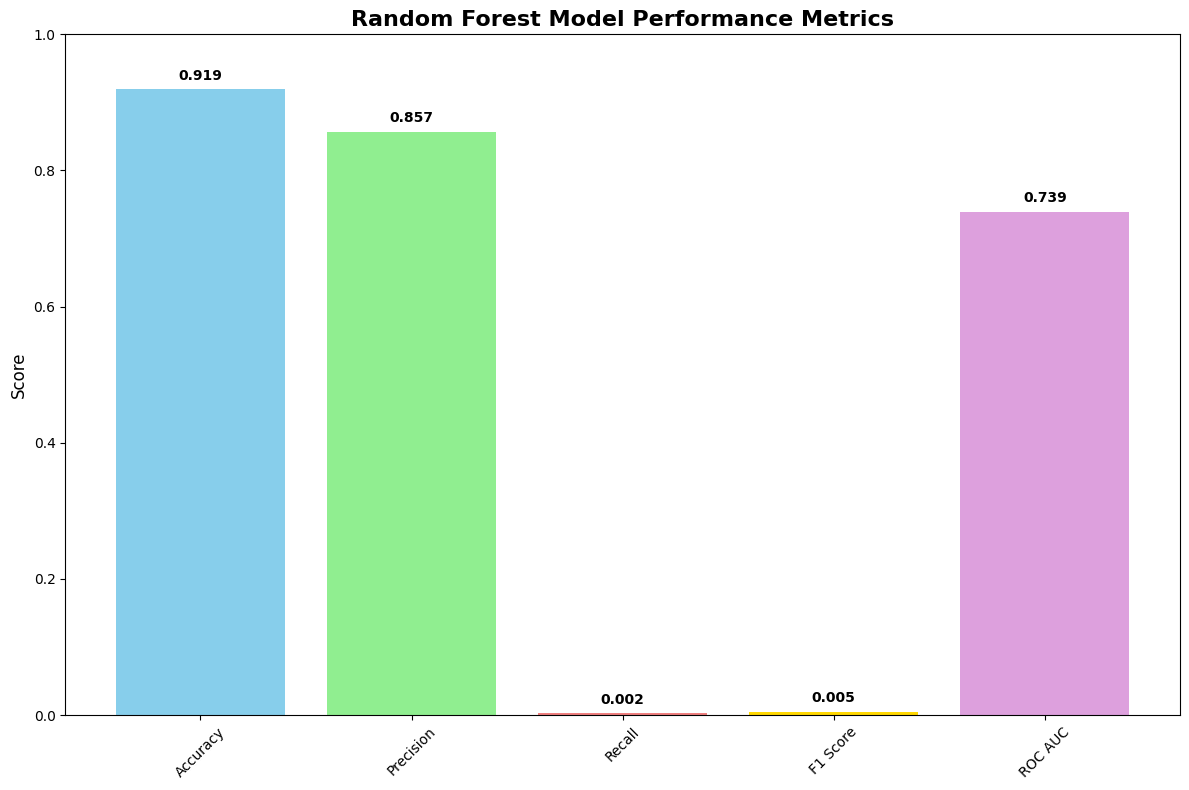


=== VERIFICATION ===
Values reused from earlier cell (no recomputation on raw X_test):
Accuracy: 0.92 (Earlier: 0.92)
Precision: 0.9 (Earlier: 0.9)
Recall: 0.0 (Earlier: 0.0)
F1 Score: 0.0048 (Earlier: 0.0048)
ROC AUC: 0.74 (Earlier: 0.74)


In [32]:
# Comprehensive Model Evaluation - Reusing previously computed encoded predictions
# NOTE:
# The RandomForest model was trained on one-hot encoded data (X_train_encoded).
# To avoid the ValueError about mismatched feature names, we DO NOT call model.predict on raw X_test.
# Instead, we reuse the already computed predictions and probabilities from earlier cells:
# accuracy, precision, recall, f1, roc_auc, average_precision, confusion, y_pred, y_pred_proba

# Reassign for clarity (final consolidated metrics)
accuracy_final = accuracy
precision_final = precision
recall_final = recall
f1_final = f1
roc_auc_final = roc_auc          # Computed with y_pred_proba earlier
avg_precision_final = average_precision
confusion_final = confusion     # From earlier evaluation on X_test_encoded

# Print detailed results
print("=== MODEL PERFORMANCE (REUSED FROM PRIOR EVALUATION) ===")
print(f"Test Set Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print(f"ROC AUC Score: {roc_auc_final:.4f}")
print(f"Average Precision Score: {avg_precision_final:.4f}")
print("Confusion Matrix:")
print(confusion_final)

# Create metrics dictionary for visualization
metrics = {
    'Accuracy': accuracy_final,
    'Precision': precision_final,
    'Recall': recall_final,
    'F1 Score': f1_final,
    'ROC AUC': roc_auc_final
}

# Bar plot of metrics
plt.figure(figsize=(12, 8))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Random Forest Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verification section
print(f"\n=== VERIFICATION ===")
print("Values reused from earlier cell (no recomputation on raw X_test):")
print(f"Accuracy: {accuracy_final:.2f} (Earlier: {accuracy:.2f})")
print(f"Precision: {precision_final:.1f} (Earlier: {precision:.1f})")
print(f"Recall: {recall_final:.1f} (Earlier: {recall:.1f})")
print(f"F1 Score: {f1_final:.4f} (Earlier: {f1:.4f})")
print(f"ROC AUC: {roc_auc_final:.2f} (Earlier: {roc_auc:.2f})")

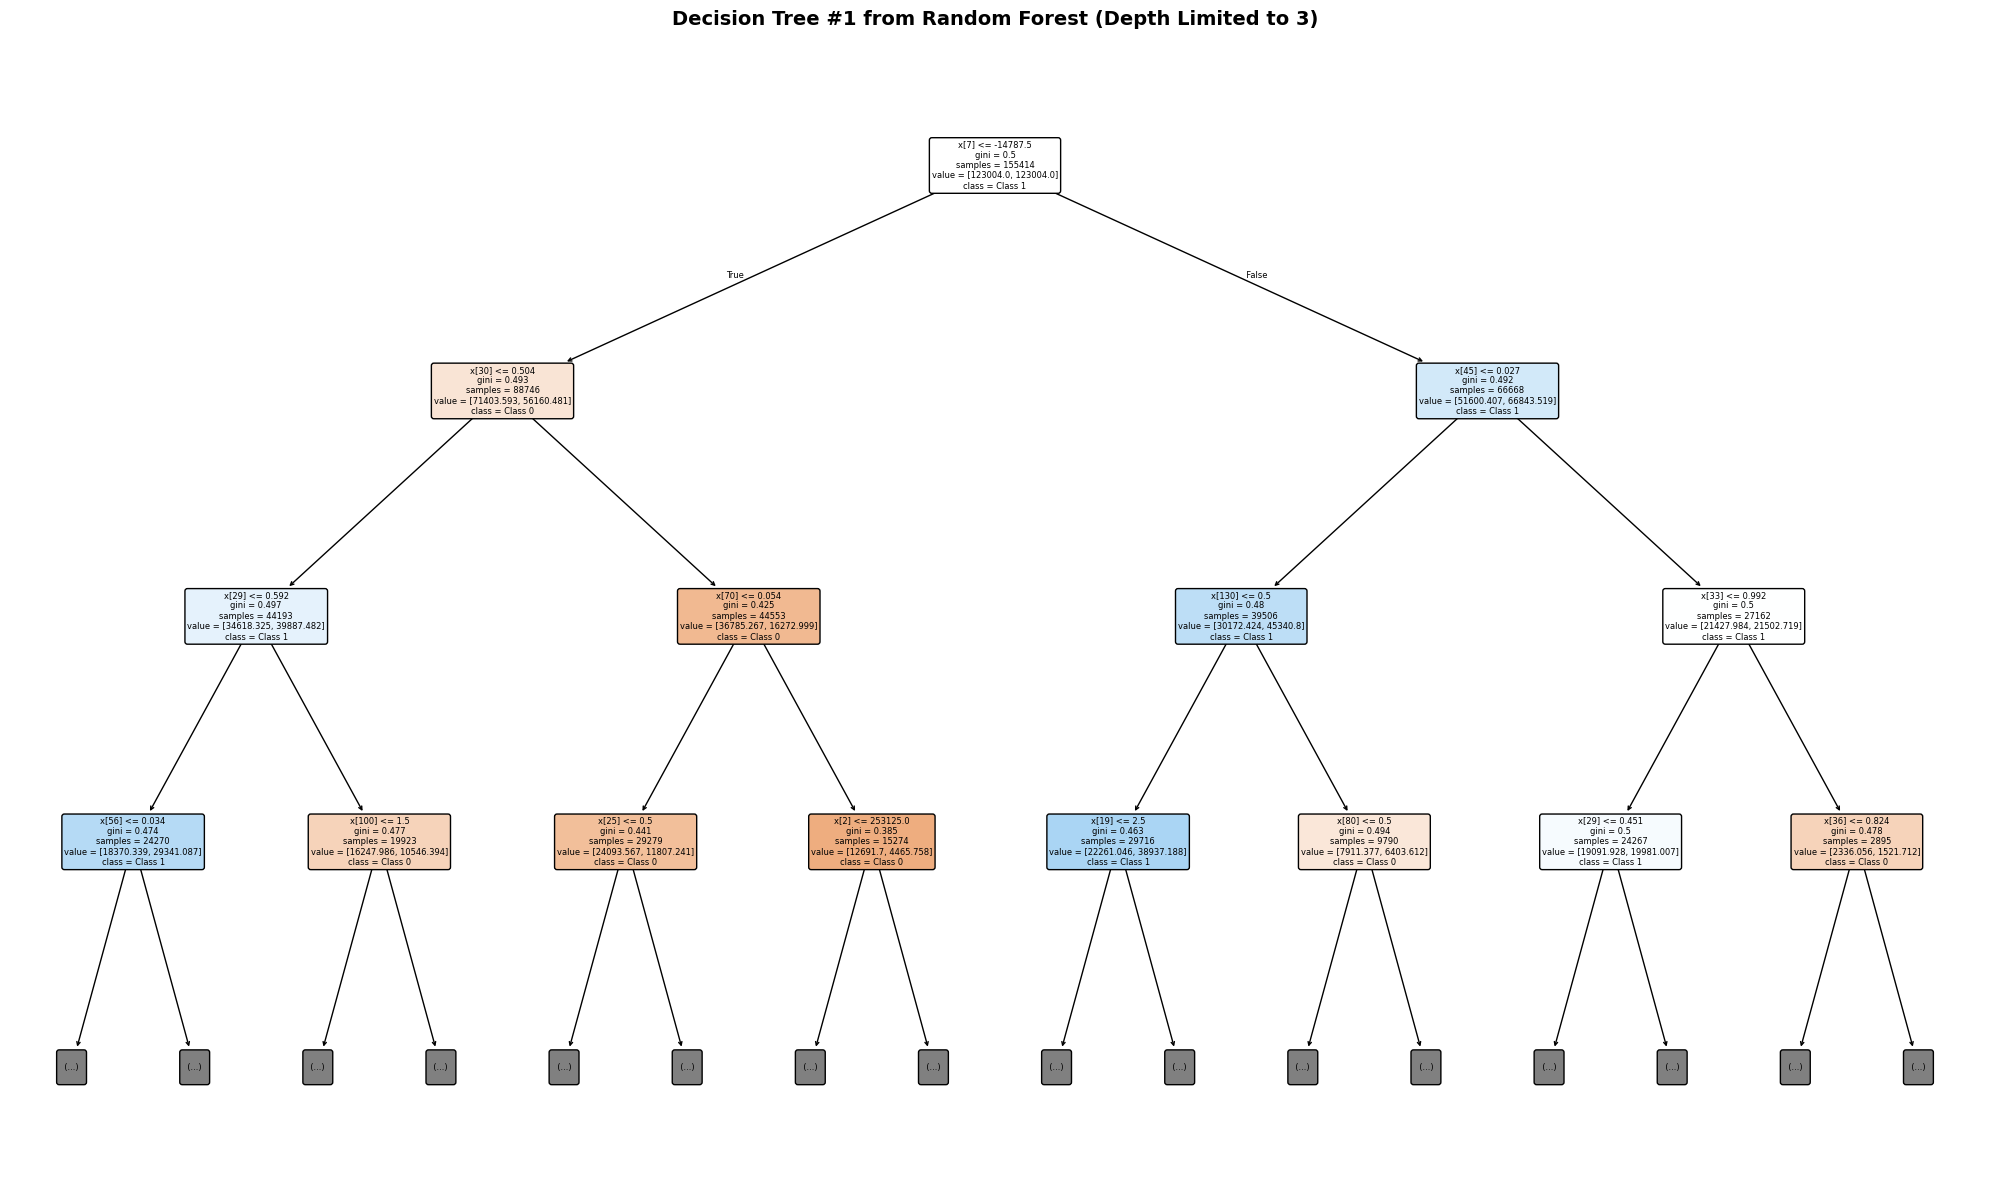


=== RANDOM FOREST TREE INFORMATION ===
Total number of trees: 300
Max depth of Tree #1: 67
Number of leaves in Tree #1: 25796
Number of nodes in Tree #1: 51591

Tree depth statistics across all 300 trees:
Min depth: 53
Max depth: 96
Average depth: 70.72


In [33]:
# Individual Tree Visualization (from Random Forest)
from sklearn.tree import plot_tree

# Visualize one tree from the Random Forest
tree_to_visualize = 0  # First tree in the forest

plt.figure(figsize=(20, 12))
plot_tree(model.estimators_[tree_to_visualize], 
          feature_names=None,  # Let sklearn handle feature naming
          class_names=['Class 0', 'Class 1'],
          filled=True,
          rounded=True,
          fontsize=6,
          max_depth=3)  # Limit depth for readability

plt.title(f'Decision Tree #{tree_to_visualize + 1} from Random Forest (Depth Limited to 3)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print information about the trees
print(f"\n=== RANDOM FOREST TREE INFORMATION ===")
print(f"Total number of trees: {len(model.estimators_)}")
print(f"Max depth of Tree #{tree_to_visualize + 1}: {model.estimators_[tree_to_visualize].tree_.max_depth}")
print(f"Number of leaves in Tree #{tree_to_visualize + 1}: {model.estimators_[tree_to_visualize].tree_.n_leaves}")
print(f"Number of nodes in Tree #{tree_to_visualize + 1}: {model.estimators_[tree_to_visualize].tree_.node_count}")

# Show depth distribution across all trees
tree_depths = [tree.tree_.max_depth for tree in model.estimators_]
print(f"\nTree depth statistics across all {len(model.estimators_)} trees:")
print(f"Min depth: {min(tree_depths)}")
print(f"Max depth: {max(tree_depths)}")
print(f"Average depth: {np.mean(tree_depths):.2f}")

In [34]:
# SHAP Analysis for Model Explainability
import shap

# NOTE:
# The RandomForest model was trained on one-hot encoded data (X_train_encoded).
# The original error arose because raw (non-encoded) categorical data (X_test) was passed to the explainer.
# We must use the encoded test set (X_test_encoded) with identical columns/order as training.

# Create SHAP explainer for the trained model (tree-based -> use TreeExplainer)
# Use feature_perturbation='interventional' to avoid additivity check failures with RandomForest
explainer = shap.TreeExplainer(model, feature_perturbation='interventional')

# Use a subset of the encoded test data for performance
sample_size = min(50, len(X_test_encoded))
X_test_sample = X_test_encoded.iloc[:sample_size]   # encoded numeric features only
y_test_sample = y_test.iloc[:sample_size]

print(f"Computing SHAP values for {sample_size} encoded test samples...")

# Compute SHAP values
shap_values_raw = explainer.shap_values(X_test_sample)

# Handle different SHAP return formats across versions:
# Older versions: list of arrays (one per class)
# Newer versions (path-dependent): single numpy array
if isinstance(shap_values_raw, list):
    if len(shap_values_raw) == 2:
        # Binary classification: take class 1 contributions
        shap_values_to_use = shap_values_raw[1]
        base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
        print("Detected list output. Using SHAP values for positive class (index 1).")
    else:
        # Unexpected number of outputs; fallback to first
        shap_values_to_use = shap_values_raw[0]
        base_value = explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
        print(f"Warning: Unexpected number of outputs ({len(shap_values_raw)}). Using index 0.")
else:
    # Direct array (already (n_samples, n_features)) or (n_samples, n_features, classes)
    if shap_values_raw.ndim == 3 and shap_values_raw.shape[2] == 2:
        shap_values_to_use = shap_values_raw[:, :, 1]
        base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
        print("Detected 3D array. Using positive class (last dimension index 1).")
    elif shap_values_raw.ndim == 2:
        shap_values_to_use = shap_values_raw
        base_value = explainer.expected_value[1] if (hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1) else explainer.expected_value
    else:
        # Fallback reshape
        shap_values_to_use = shap_values_raw.reshape(shap_values_raw.shape[0], -1)
        base_value = explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
        print("Warning: Reshaped unexpected SHAP output to 2D.")

print("SHAP values computed successfully!")
print(f"Type of shap_values_raw: {type(shap_values_raw)}")
try:
    print(f"SHAP values (selected) shape: {shap_values_to_use.shape}")
except Exception:
    pass
print(f"Base value: {base_value}")
print(f"Encoded sample features shape: {X_test_sample.shape}")

# Mean absolute SHAP importance per feature
mean_shap_importance = np.abs(shap_values_to_use).mean(axis=0)

print(f"SHAP importance vector shape: {mean_shap_importance.shape}")
print(f"Number of encoded features: {len(X_test_sample.columns)}")

if len(mean_shap_importance) == len(X_test_sample.columns):
    print("✓ Shapes match perfectly!")
else:
    print(f"⚠ Shape mismatch! SHAP: {len(mean_shap_importance)}, Features: {len(X_test_sample.columns)}")

# Assemble importance DataFrame
feature_importance_shap = (
    pd.DataFrame({
        'feature': X_test_sample.columns,
        'shap_importance': mean_shap_importance
    })
    .sort_values('shap_importance', ascending=False)
)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_tree.py:253: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


Computing SHAP values for 50 encoded test samples...
Detected 3D array. Using positive class (last dimension index 1).
SHAP values computed successfully!
Type of shap_values_raw: <class 'numpy.ndarray'>
SHAP values (selected) shape: (50, 245)
Base value: 0.49999999999999817
Encoded sample features shape: (50, 245)
SHAP importance vector shape: (245,)
Number of encoded features: 245
✓ Shapes match perfectly!

Top 10 Most Important Features (SHAP-based):
                   feature  shap_importance
29            EXT_SOURCE_2         0.037670
30            EXT_SOURCE_3         0.036965
28            EXT_SOURCE_1         0.018925
8            DAYS_EMPLOYED         0.015792
7               DAYS_BIRTH         0.015449
78  DAYS_LAST_PHONE_CHANGE         0.013704
10         DAYS_ID_PUBLISH         0.013280
3               AMT_CREDIT         0.012164
9        DAYS_REGISTRATION         0.012146
5          AMT_GOODS_PRICE         0.011870


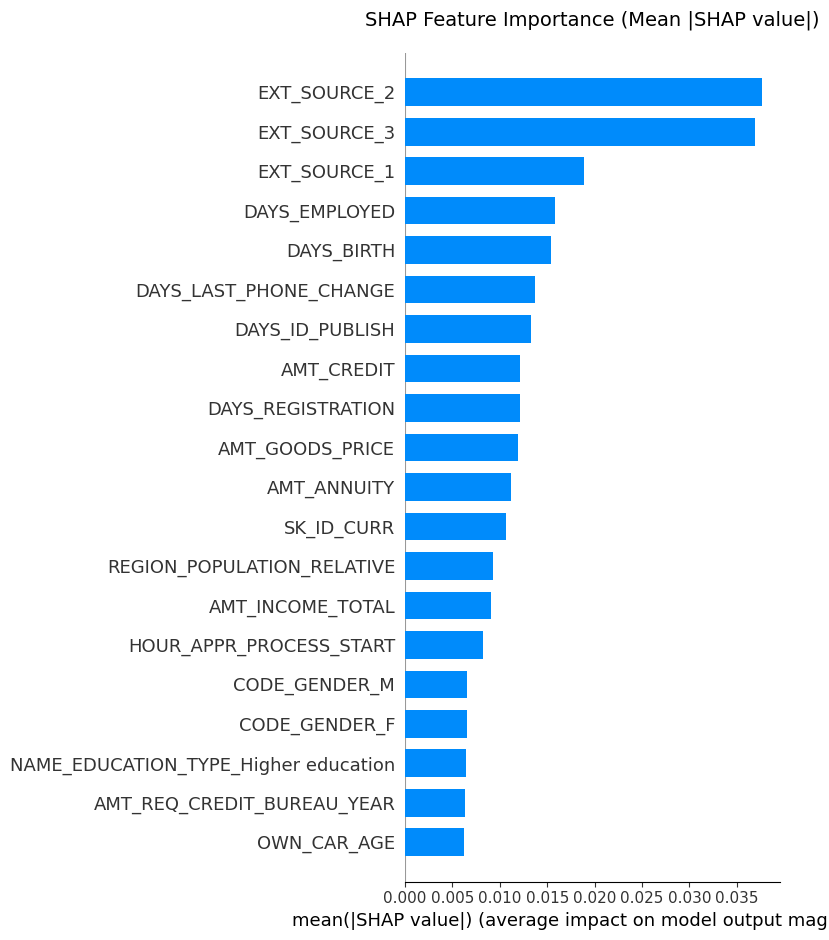

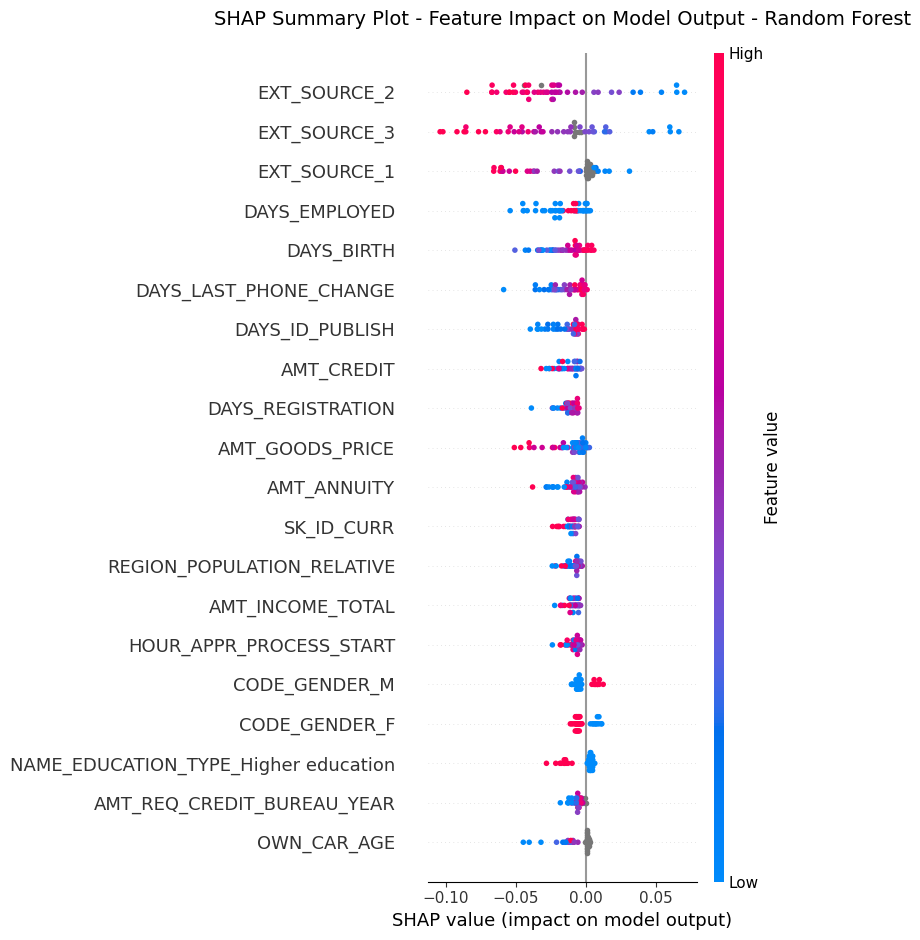

In [35]:
# SHAP Summary Plot - Shows feature importance and impact direction
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_use, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature values
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_to_use, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Random Forest', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== SAMPLE 1 (Index 0) ===
Actual label: 0
Predicted probability (class 1): 0.0233


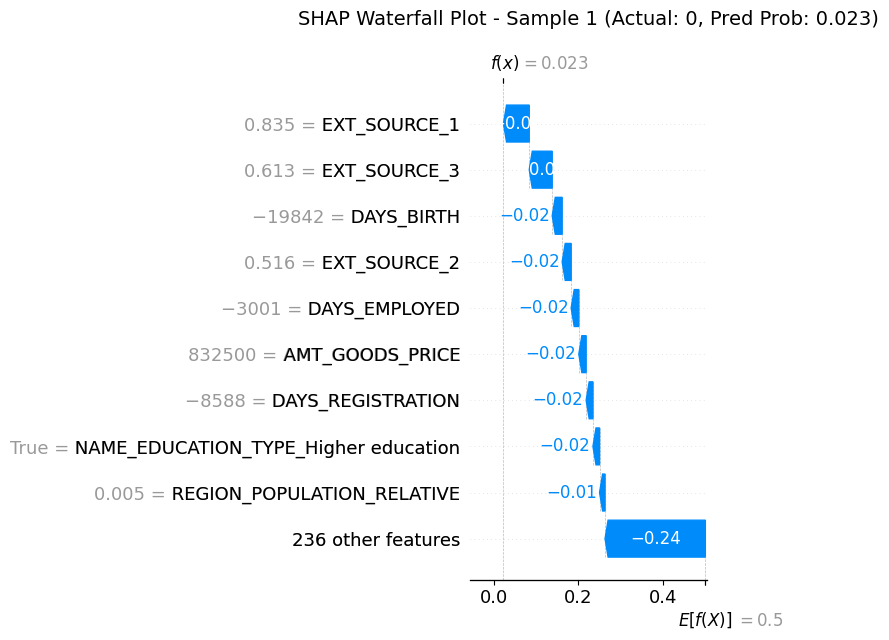


=== SAMPLE 2 (Index 1) ===
Actual label: 0
Predicted probability (class 1): 0.0267


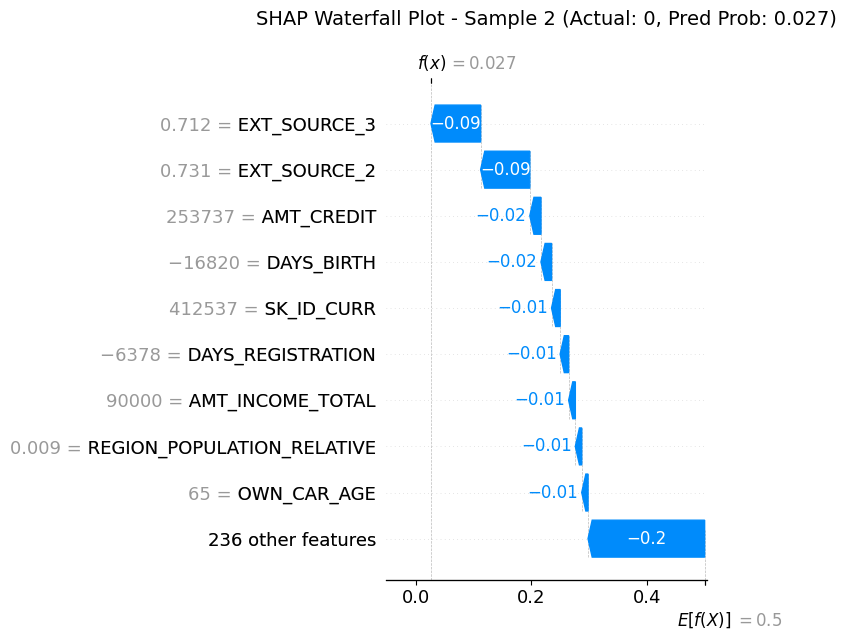


=== SAMPLE 3 (Index 2) ===
Actual label: 0
Predicted probability (class 1): 0.0600


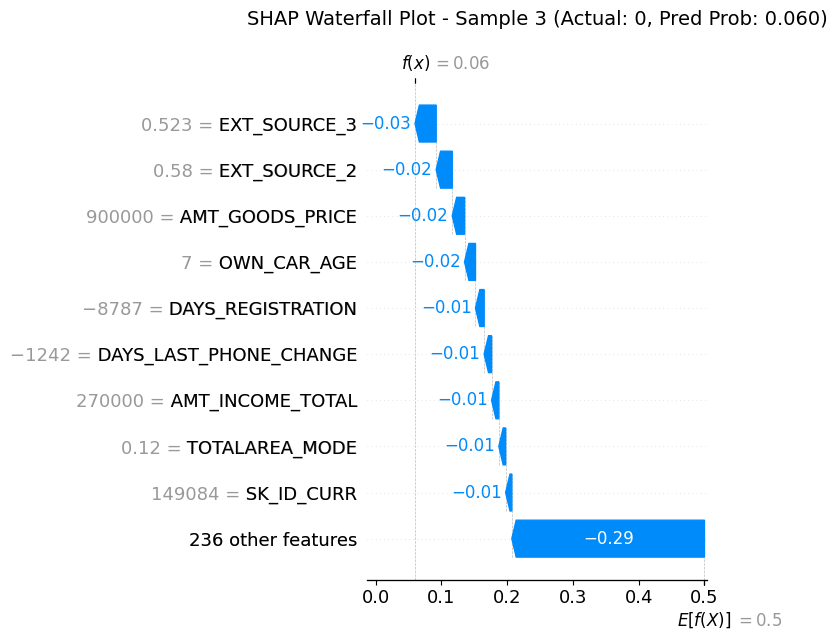

In [36]:
# SHAP Waterfall Plot - Explain individual predictions
# Select a few interesting samples to explain
sample_indices = [0, 1, 2]  # First three samples

for i, idx in enumerate(sample_indices):
    actual_label = y_test_sample.iloc[idx]
    predicted_prob = model.predict_proba(X_test_sample.iloc[[idx]])[0, 1]
    
    print(f"\n=== SAMPLE {i+1} (Index {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")
    
    # Create waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx], 
            base_values=base_value, 
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()